<a href="https://colab.research.google.com/github/Jueunkim429/Colab-Notebooks/blob/main/Where_people_look.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. mat 파일 읽기

In [6]:
import scipy.io
import pandas as pd
mat = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/eyedata.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Sep 16 09:40:33 2021',
 '__version__': '1.0',
 '__globals__': [],
 'block': array([[array([[1]], dtype=uint8)]], dtype=object),
 'trial': array([[array([[268]], dtype=uint16)]], dtype=object),
 'eyeData': array([[array([[   521.74683544,    371.328     ],
                [   521.74683544,    369.216     ],
                [   518.96202532,    364.992     ],
                ...,
                [   246.25316456,    122.112     ],
                [ -1126.2721519 ,   -849.916     ],
                [-19916.29113924, -14551.752     ]])]], dtype=object)}

# 2. 데이터프레임 변환

In [7]:
data_raw=mat['eyeData'][0][0]
data_raw

array([[   521.74683544,    371.328     ],
       [   521.74683544,    369.216     ],
       [   518.96202532,    364.992     ],
       ...,
       [   246.25316456,    122.112     ],
       [ -1126.2721519 ,   -849.916     ],
       [-19916.29113924, -14551.752     ]])

In [8]:
pdata = pd.DataFrame(data_raw)

# 3. 데이터 탐색하기

In [9]:
pdata

,0,1
0,521.746835,371.328
1,521.746835,369.216
2,518.962025,364.992
3,521.746835,362.880
4,518.962025,362.880
...,...,...
720,892.126582,508.608
721,892.126582,521.280
722,246.253165,122.112
723,-1126.272152,-849.916


In [10]:
# Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
pdata.columms=['x','y']
pdata.describe().transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,count,mean,std,min,25%,50%,75%,max
0,725.0,676.444653,793.393759,-19916.291139,521.746835,744.531646,894.911392,908.835443
1,725.0,300.868497,568.561942,-14551.752000,278.400000,324.864000,426.240000,521.280000


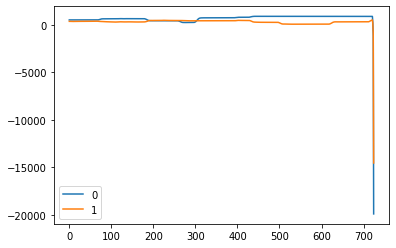

In [11]:
pdata.plot()

In [12]:
pdata.drop([723,724], inplace=True)

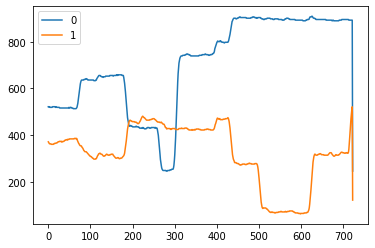

In [13]:
pdata.plot()

# 4. 추출한 pdata의 좌표값을 이용하여 eye tracking 데이터의 궤적과 자극 이미지를 함께 그리기

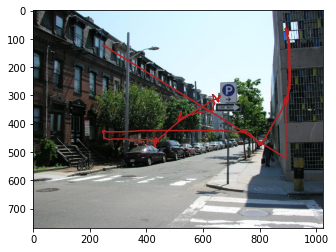

In [14]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/eyesample_stim.jpeg')

fig,ax=plt.subplots()
ax.imshow(img)
ax.plot(pdata[0],pdata[1],color='firebrick')

## 1) 두번째 궤적

In [15]:
mat2 = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/eyedata2.mat')
mat2

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Sep 16 10:04:00 2021',
 '__version__': '1.0',
 '__globals__': [],
 'block': array([[array([[1]], dtype=uint8)]], dtype=object),
 'trial': array([[array([[324]], dtype=uint16)]], dtype=object),
 'eyeData': array([[array([[  496.6835443 ,   377.664     ],
                [  496.6835443 ,   379.776     ],
                [  496.6835443 ,   379.776     ],
                ...,
                [  479.97468354,   479.04      ],
                [  479.97468354,   479.04      ],
                [-9455.05696203, -6919.528     ]])]], dtype=object)}

In [16]:
data_raw2=mat2['eyeData'][0][0]
data_raw2

array([[  496.6835443 ,   377.664     ],
       [  496.6835443 ,   379.776     ],
       [  496.6835443 ,   379.776     ],
       ...,
       [  479.97468354,   479.04      ],
       [  479.97468354,   479.04      ],
       [-9455.05696203, -6919.528     ]])

In [17]:
pdata2 = pd.DataFrame(data_raw2)

In [18]:
pdata2

,0,1
0,496.683544,377.664
1,496.683544,379.776
2,496.683544,379.776
3,496.683544,379.776
4,496.683544,381.888
...,...,...
720,479.974684,476.928
721,479.974684,479.040
722,479.974684,479.040
723,479.974684,479.040


In [19]:
pdata2.columms=['x','y']
pdata2.describe().transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
0,725.0,562.967481,383.738685,-9455.056962,499.468354,510.607595,677.696203,697.189873
1,725.0,352.328419,278.464119,-6919.528000,299.520000,352.320000,381.888000,491.712000


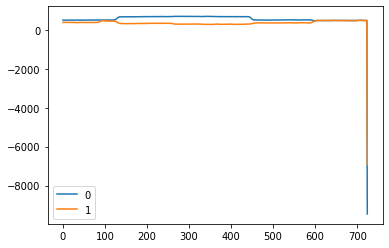

In [20]:
pdata2.plot()

In [21]:
pdata2.drop([723,724], inplace=True)

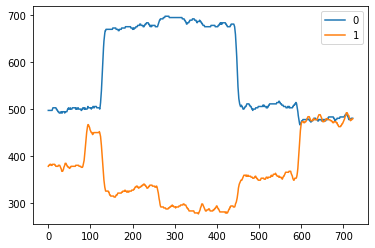

In [22]:
pdata2.plot()

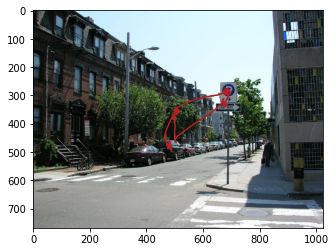

In [23]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/eyesample_stim.jpeg')

fig,ax=plt.subplots()
ax.imshow(img)
ax.plot(pdata2[0],pdata2[1],color='firebrick')

## 2) 세번째 사람

In [24]:
mat3 = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/eyedata3.mat')
mat3

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Sep 16 10:04:28 2021',
 '__version__': '1.0',
 '__globals__': [],
 'block': array([[array([[1]], dtype=uint8)]], dtype=object),
 'trial': array([[array([[156]], dtype=uint8)]], dtype=object),
 'eyeData': array([[array([[528.63865546, 376.6374502 ],
                [528.63865546, 376.6374502 ],
                [525.86554622, 376.6374502 ],
                ...,
                [647.88235294, 393.46613546],
                [647.88235294, 393.46613546],
                [647.88235294, 391.3625498 ]])]], dtype=object)}

In [25]:
data_raw3=mat3['eyeData'][0][0]
data_raw3

array([[528.63865546, 376.6374502 ],
       [528.63865546, 376.6374502 ],
       [525.86554622, 376.6374502 ],
       ...,
       [647.88235294, 393.46613546],
       [647.88235294, 393.46613546],
       [647.88235294, 391.3625498 ]])

In [26]:
pdata3 = pd.DataFrame(data_raw3)

In [27]:
pdata3

,0,1
0,528.638655,376.637450
1,528.638655,376.637450
2,525.865546,376.637450
3,525.865546,376.637450
4,525.865546,380.844622
...,...,...
720,647.882353,393.466135
721,650.655462,393.466135
722,647.882353,393.466135
723,647.882353,393.466135


In [28]:
pdata3.columms=['x','y']
pdata3.describe().transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,count,mean,std,min,25%,50%,75%,max
0,725.0,604.449725,168.598769,295.697479,523.092437,645.109244,661.747899,911.327731
1,725.0,352.514400,54.256692,284.079681,311.426295,342.980080,376.637450,500.749004


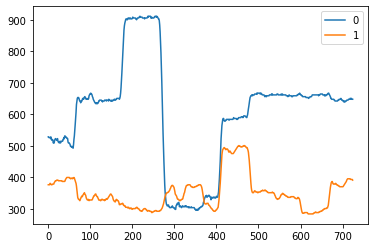

In [29]:
pdata3.plot()

In [30]:
pdata3.drop([723,724], inplace=True)

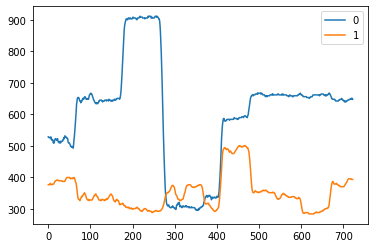

In [31]:
pdata3.plot()

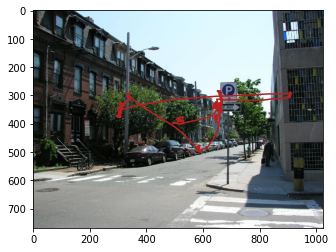

In [32]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/eyesample_stim.jpeg')

fig,ax=plt.subplots()
ax.imshow(img)
ax.plot(pdata3[0],pdata3[1],color='firebrick')

## 3) 세 가지 한번에 나타내기

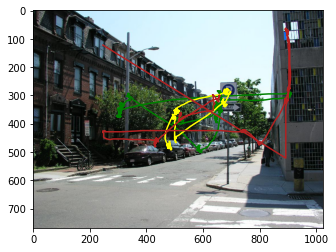

In [33]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/eyesample_stim.jpeg')

fig,ax=plt.subplots()
ax.imshow(img)
ax.plot(pdata3[0],pdata3[1],color='green')
ax.plot(pdata2[0],pdata2[1],color='yellow')
ax.plot(pdata[0],pdata[1],color='firebrick')